# Case Study 2 : Putting Twitter Data into the Cloud

Due Date: 2/15/2020, **BEFORE the beginning of class at 2:00pm EST**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

<a title="Fabián Alexis [CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)]" href="https://commons.wikimedia.org/wiki/File:Antu_mongodb.svg"><img width="512" alt="Antu mongodb" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Antu_mongodb.svg/512px-Antu_mongodb.svg.png"></a>

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Hayden Smith

    Rebecca Noris

    Nathan Kumar

    Hannah Jaworski

    Kelsey Moody

**Don't forget!**
* You will need to install the pymongo library to access MongoDB
 * pip install pymongo
* You will also need to install dnspython to access the cloud version of MongoDB
 * pip install dnspython

** NOTE **
* **Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost**.

# Problem 1 (20 points):  Get a cloud database account using MongoDB Atlas

Get a free cloud hosted MongoDB database account at https://www.mongodb.com/atlas/database.  You will need to: 

* Create a database cluster using the MongoDB web interface
* Get your MongoDB credentials
* Create a document collection in MongoBD


In [1]:
! pip install pymongo
! pip install dnspython
! pip install twitter
! pip install geopandas

     |████████████████████████████████| 266 kB 4.6 MB/s 
     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 245 kB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 


In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pymongo
client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")


# Problem 2 (20 points):  Read Twitter data into your cloud MongoDB database

Gather Twitter data and upload it to your cloud database.  You will need to:

* Get your cloubd MongoDB credentials using the MongoDB web interface
* Insert those credentials into your Juypyter notebook using pymongo
* Gather Twitter data as in Case Study 1
* Upload your Twitter data to the MongoDB cloud document collection

Note, to do you this question remember that you will need *two sets of credentials*

* One set for the MongoDB Atlas database
* One set for the Twitter developed API

Of course, there are not the same!

In [3]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import twitter

# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = ''

CONSUMER_SECRET = ''

OAUTH_TOKEN = ''

OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

#mongoDB
import pymongo
client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")
db = client['caseStudy2DB']

#collect tweets
import json
q = 'NFL'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_NFL']

# Write data to mongoDB
data = coll.insert_many(statuses)

q = 'MLB'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_MLB']

# Write data to mongoDB
data = coll.insert_many(statuses)

q = 'NBA'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_NBA']

# Write data to mongoDB
data = coll.insert_many(statuses)

{'statuses': [{'created_at': 'Tue Feb 15 02:23:29 +0000 2022', 'id': 1493410606728335364, 'id_str': '1493410606728335364', 'text': 'RT @JimNagy_SB: Impossible to watch Cole Strange’s @GoMocsFB tape and not love how he strains &amp; finishes. Got after people same way all wee…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'JimNagy_SB', 'name': 'Jim Nagy', 'id': 1030165930633060353, 'id_str': '1030165930633060353', 'indices': [3, 14]}, {'screen_name': 'GoMocsFB', 'name': 'Chattanooga Football', 'id': 809904042, 'id_str': '809904042', 'indices': [51, 60]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1372286011175231488, 'id_str': '13

# Problem 3 (20 points):  Use a regular expression to read a subset of your Tweets out of MongoDB

Use regular expressions to analyze properties of your data.  For example, you can 

* search for trends that have a large volume, 
* search for tweets with geotags, 
* search for tweets that can contain a certain string,
* anything else you think might be useful for a product!

5


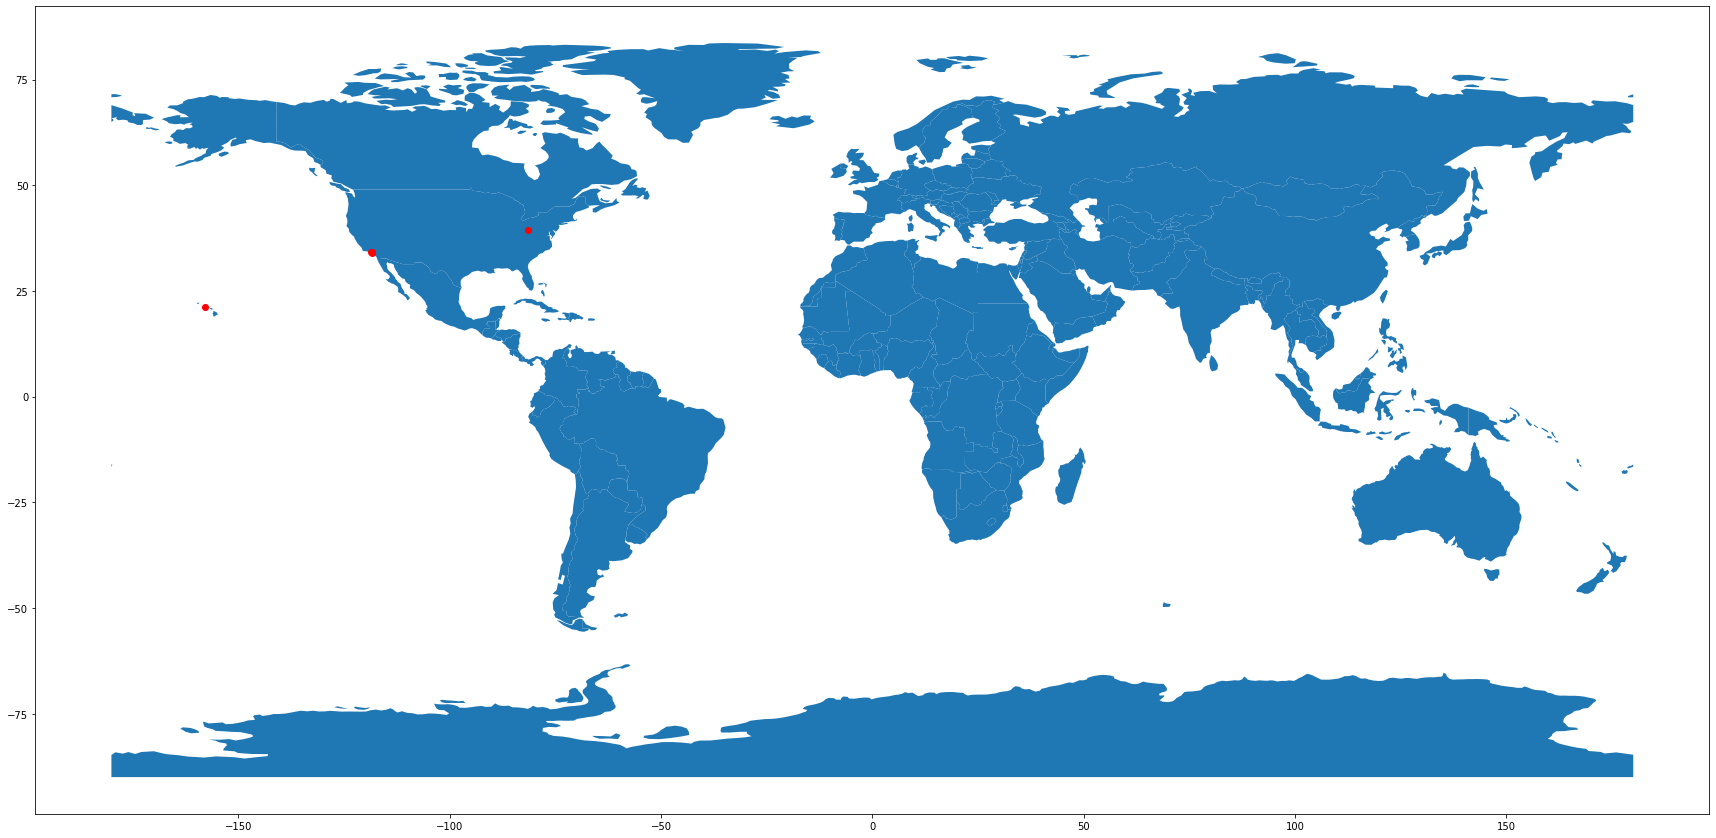

Superbowl Tweets: 3208
Rams Tweets: 1197
Bengals Tweets: 866
Superbowl Rams Tweets: 466
Superbowl Bengals Tweets: 311


In [4]:
from pandas.core.accessor import register_dataframe_accessor
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#mongoDB
import pymongo
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")
db = client['caseStudy2DB']
coll = db['_NFL']
cursor = coll.find({'geo': {'$ne': None}})
cursorCount = 0
#geotagged data
data = []
for tweet in cursor:
    tweetDict = {'text':tweet['text'], 'name':tweet['user']['name'],
                 'Latitude':tweet['geo']['coordinates'][0],
                 'Longitude':tweet['geo']['coordinates'][1]} 
    data += [tweetDict]
    cursorCount += 1
    
df = pd.DataFrame(data) 
print(cursorCount)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(30,30))
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

gdf.plot(ax=ax, color='red')
plt.show()

#tweets containing certain strings
superbowl = coll.find({ '$or':[{'text':  {'$regex': '.*superbowl.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*super bowl.*', '$options': 'i' }}]})
rams = coll.find({'text':  {'$regex': '.*rams.*', '$options': 'i' }})
bengals = coll.find({'text':  {'$regex': '.*bengals.*', '$options': 'i' }})

superbowlrams = coll.find({'$and': [{ '$or':[{'text':  {'$regex': '.*superbowl.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*super bowl.*', '$options': 'i' }}]},
                             {'text':  {'$regex': '.*rams.*', '$options': 'i' }}]})
superbowlbengals = coll.find({'$and': [{ '$or':[{'text':  {'$regex': '.*superbowl.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*super bowl.*', '$options': 'i' }}]},
                             {'text':  {'$regex': '.*bengals.*', '$options': 'i' }}]})
counter = 0
for tweet in superbowl:
  counter += 1
print("Superbowl Tweets: " + str(counter))

counter = 0
for tweet in rams:
  counter += 1
print("Rams Tweets: " + str(counter))

counter = 0
for tweet in bengals:
  counter += 1
print("Bengals Tweets: " + str(counter))

counter = 0
for tweet in superbowlrams:
  counter += 1
print("Superbowl Rams Tweets: " + str(counter))

counter = 0
for tweet in superbowlbengals:
  counter += 1
print("Superbowl Bengals Tweets: " + str(counter))


# Problem 4 (20 points): Business question 

Run some additional experiments with your data to gain familiarity with the MongoDB.

* Come up with a business question that Twitter data and MongoDB could help answer.
* Decribe the business case.
* How could MongoDB help a company to scale up its computation environment?

In [5]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Business Question: 

# For our business question, we decided to search for the most frequently mentioned LA Rams football players – 
# a team in the 2022 Super Bowl – in order to decide who’s jerseys we should order the most to sell at the Super Bowl. 
# We looked up popular player names on twitter and specific hashtags that include their name. We can also look at geotags
# to know where to sell more of a specific jersey in stores, but this is dependent on the frequency of geotags, which we know are not frequent as seen in problem 3.
# We can use our model to make money for other teams and sports, other than the LA Rams.
# We can change the search terms based on the team or company employing us, which also means we could apply the same concepts to sports other than football.
# MongoDB will help us and other companies, because it gives us the ability to sort and store the tweets about specific players and teams,
# and we can store large amounts of data for more accurate decision making. Instead of only being able to look at a certain amount of Tweets in real time,
# MongoDB allows companies to look at exponentially more data and to store it for future use.

from pandas.core.accessor import register_dataframe_accessor
import pymongo
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

#retrieve DB from mongoDB
client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")
db = client['caseStudy2DB']
coll = db['_NFL']
cursor = coll.find({'geo': {'$ne': None}})
cursorCount = 0


#tweets contating certain strings
Rams = coll.find({ '$or':[{'text':  {'$regex': '.*Rams.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*Los Angeles Rams.*', '$options': 'i' }}
                          ,{'text':  {'$regex': '.*LA Rams.*', '$options': 'i' }}]})

donald = coll.find({ '$or':[{'text':  {'$regex': '.*Donald.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*Aaron.*', '$options': 'i' }}]})

stafford = coll.find({ '$or':[{'text':  {'$regex': '.*Stafford.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*Matt.*', '$options': 'i' }}]})

kupp = coll.find({ '$or':[{'text':  {'$regex': '.*Kupp.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*Cooper.*', '$options': 'i' }}]})

#stafford = coll.find({'text':  {'$regex': '.*Stafford.*', '$options': 'i' }})
#kupp = coll.find({'text':  {'$regex': '.*Kupp.*', '$options': 'i' }})

donaldjersey = coll.find({'$and': [{ '$or':[{'text':  {'$regex': '.*Donald.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*jersey.*', '$options': 'i' }}]},
                             {'text':  {'$regex': '.*rams.*', '$options': 'i' }}]})
staffordjersey = coll.find({'$and': [{ '$or':[{'text':  {'$regex': '.*Stafford.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*jersey.*', '$options': 'i' }}]},
                             {'text':  {'$regex': '.*rams.*', '$options': 'i' }}]})
kuppjersey = coll.find({'$and': [{ '$or':[{'text':  {'$regex': '.*Kupp.*', '$options': 'i' }}
                               ,{'text':  {'$regex': '.*jersey.*', '$options': 'i' }}]},
                             {'text':  {'$regex': '.*rams.*', '$options': 'i' }}]})

counter = 0
for tweet in Rams:
  counter += 1
print("Rams Tweets: " + str(counter))

counter = 0
for tweet in donald:
  counter += 1
print("Donald Tweets: " + str(counter))

counter = 0
for tweet in stafford:
  counter += 1
print("Stafford Tweets: " + str(counter))

counter = 0
for tweet in kupp:
  counter += 1
print("Kupp Tweets: " + str(counter))

counter = 0
for tweet in donaldjersey:
  counter += 1
print("Donald Jersey Tweets: " + str(counter))

counter = 0
for tweet in staffordjersey:
  counter += 1
print("Stafford Jersey Tweets: " + str(counter))

counter = 0
for tweet in kuppjersey:
  counter += 1
print("Kupp Jersey Tweets: " + str(counter))

# having collected tweets on three of the most popular rams players we are able to compare the amounts of tweets realted back to their jerseys
# it is clear that kupp jerseys has been tweeted about the most often and we can assume that there will be a high percentage of desire for Kupp jerseys 
# therefore those in charge of merchandizing on behalf of the ram should produce more Kupp jerseys for the future. 

# We acknowledge there is is conflict in the data collection as there may be many donalds within the data. also, this is dependent on the data we collect and the amount we collect
# there are also limits on if the tweets are talking postibvely or negatively about the players. 
# although there may be issues with the collect of data at the moment we know that the data is important, no matter the bias or context. 

# to reiterate, we can apply this principle to many other sports teams and make money of their desire to produce more wanted jerseys which in turn will make them money

Rams Tweets: 1197
Donald Tweets: 586
Stafford Tweets: 403
Kupp Tweets: 440
Donald Jersey Tweets: 47
Stafford Jersey Tweets: 43
Kupp Jersey Tweets: 101


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 15 minutes' talk) to present about the case study . We will ask *all* teams to present their case studies in class for this case study. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through canvas.wpi.edu



# Grading Criteria:

**Totoal Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 20
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 20
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 20
    -----------------------------------
  
    -----------------------------------
    Question 4:  Business question
    Points: 20
    -----------------------------------


---------------------------------------------------------------------------
**Slides (for 5-10 minutes of presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
